In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [2]:
def build_graph(nodes, edges):
    return {i: [j for j in nodes if j!=i and (i, j) in edges or (j, i) in edges] for i in nodes}

In [3]:
nodes = [1, 2, 3, 4, 5]
edges = [(1, 2), (3, 4), (1, 5)]
build_graph(nodes, edges)

{1: [2, 5], 2: [1], 3: [4], 4: [3], 5: [1]}

In [4]:
g = build_graph(nodes, edges)

In [5]:
def generate_random_graph():
    n = 7
    prob = 0.1
    V = list(range(1, n+1))
    E = [(i, j) for i in V for j in V if i<j and random.random() < prob]
    return V, E

generate_random_graph()

([1, 2, 3, 4, 5, 6, 7], [(1, 5), (2, 5), (2, 7), (4, 5), (4, 7)])

In [6]:
def convert_to_G(E):
    G = nx.Graph()
    G.add_edges_from(E)
    return G

In [7]:
def plot_graph(G):
    nx.draw(G, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')

In [17]:
def in_any_set(k, cc):
    for i, _set in enumerate(cc):
        if k in _set:
            return True
    return False

def any_elem_in_any_set(l, cc):
    for elem in l:
        if in_any_set(elem, cc):
            return True
    return False

def which_set(k, cc):
    for i, _set in enumerate(cc):
        if k in _set:
            return i
    return None

def which_any_elem_in_any_set(l, cc):
    for elem in l:
        if in_any_set(elem, cc):
            return elem
    return None

def my_connected_components(g):
    cc = []
    #print("g", g)
    g_list = [set([key, *value]) for key, value in g.items() if value != []]
    #print("g_list", g_list)
    for s1 in g_list:
        for s2 in g_list:
            if s1 & s2 != set():
                union = s1.union(s2)
                if any_elem_in_any_set(union, cc):
                    index = which_set(which_any_elem_in_any_set(union, cc), cc)
                    cc[index] = cc[index].union(union)
                else:
                    cc.append(union)
    for s1 in cc:
        for s2 in cc:
            if s1 & s2 != set():
                #print("hey", s1, s2)
                None
    return cc

def any_intersection(cc):
    for s1 in cc:
        for s2 in cc:
            if s1 != s2:
                if s1 & s2 != set():
                    return True
    return False

def my_connected_components(g):
    cc = [set([key, *value]) for key, value in g.items() if value != []]
    while any_intersection(cc):
        cc1 = []
        for i, s1 in enumerate(cc):
            for s2 in cc:
                if s1 != s2 and s1 & s2 != set():
                    cc1.append(s1.union(s2))
        cc = cc1
    return cc

def my_connected_components(g):
    g_list = [set([key, *value]) for key, value in g.items() if value != []]
    print(g_list)
    cc = []
    for i in range(len(g_list)):
        for j in range(len(g_list)):
            if i != j:
                if any([elem in g_list[i] for elem in g_list[j]]):
                    u = g_list[i].union(g_list[j])
                    if u not in cc:
                        cc.append(u)
    return cc
    
def my_no_connected_components(graph):
    return len(my_connected_components(graph))

#my_connected_components(g)
my_connected_components({1: [6], 2: [5], 3: [4, 5], 4: [3, 6], 5: [2, 3], 6: [1, 4], 7: []})
#any_intersection([{1, 3, 4, 5, 6}, {2, 3, 4, 5, 6}])
#any_intersection([{1, 2, 3}, {5, 6, 9}])

[{1, 6}, {2, 5}, {3, 4, 5}, {3, 4, 6}, {2, 3, 5}, {1, 4, 6}]


[{1, 3, 4, 6},
 {1, 4, 6},
 {2, 3, 4, 5},
 {2, 3, 5},
 {3, 4, 5, 6},
 {1, 3, 4, 5, 6},
 {2, 3, 4, 5, 6}]

In [46]:
def in_any_set(k, cc):
    for _set in cc:
        if k in _set:
            return True
    return False

def which_set(k, cc):
    for i, _set in enumerate(cc):
        if k in _set:
            return i
    return None

def my_connected_components(g):
    g_list = [set([key, *value]) for key, value in g.items() if value != []]
    print("g_list", g_list)
    cc = []
    acc = set()
    for i in range(len(g_list)):
        for j in range(len(g_list)):
            if i != j:
                inter = g_list[i] & g_list[j]
                if inter != set():
                    acc = acc.union(g_list[i].union(g_list[j])) 
                    for elem in acc:
                        flag = 0
                        if in_any_set(elem, cc):
                            ws = which_set(elem, cc)
                            cc[ws] = cc[ws].union(acc)
                            flag = 1
                    if flag == 0:
                        cc.append(acc)
    return cc

my_connected_components({1: [6], 2: [5], 3: [4, 5], 4: [3, 6], 5: [2, 3], 6: [1, 4], 7: []})

g_list [{1, 6}, {2, 5}, {3, 4, 5}, {3, 4, 6}, {2, 3, 5}, {1, 4, 6}]


[{1, 2, 3, 4, 5, 6}]

g_list [{1, 5}, {1, 5}]
g_list [{1, 4}, {2, 3}, {2, 3}, {1, 4}]
Failure
{1: [4], 2: [3], 3: [2], 4: [1], 5: [], 6: [], 7: []}
g_list [{1, 4}, {2, 3}, {2, 3}, {1, 4}]
nx   [{1, 4}, {2, 3}] 
mine [{1, 2, 3, 4}]


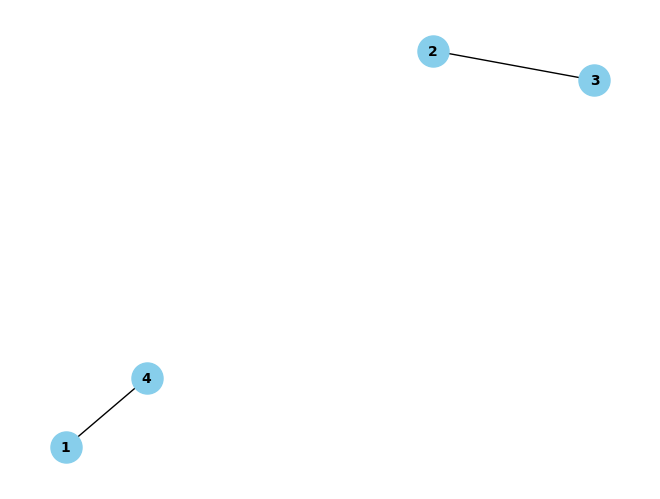

In [47]:
for _ in range(10000):
    VERTS, EDGES = generate_random_graph()
    g = build_graph(VERTS, EDGES)
    G = convert_to_G(EDGES)
    #print("nx  ", list(nx.connected_components(G)), "\nmine", my_connected_components(g))
    if len(list(nx.connected_components(G))) != my_no_connected_components(g):
        print("Failure")
        print(g)
        print("nx  ", list(nx.connected_components(G)), "\nmine", my_connected_components(g))
        plot_graph(G)
        break
    #print(g)
    #plot_graph(G)
    #plt.show()


In [58]:
def my_connected_components(g):
    g_list = [set([key, *value]) for key, value in g.items() if value != []]
    print("g_list", g_list)

    for i, si in enumerate(g_list):
        acc = []
        for j, sj in range(g_list):
            if i != j:
                if s1 & s2 != set():
                    acc.append(list(s1.union(s2))
        for elem in acc()
                    

        
    
    return nodes

my_connected_components({1: [6], 2: [5], 3: [4, 5], 4: [3, 6], 5: [2, 3], 6: [1, 4], 7: []})

g_list [{1, 6}, {2, 5}, {3, 4, 5}, {3, 4, 6}, {2, 3, 5}, {1, 4, 6}]


[1, 2, 3, 4, 5]

In [51]:
g = {1: [6], 2: [5], 3: [4, 5], 4: [3, 6], 5: [2, 3], 6: [1, 4], 7: []}
list(g.keys())

[1, 2, 3, 4, 5, 6, 7]

In [60]:
a = {1, 2}
a.add({3, 4})

TypeError: unhashable type: 'set'

In [62]:
a = list(set([1, 2, 3, 3, 4, 5]))
a

[1, 2, 3, 4, 5]

In [79]:
class my_connected_components:
    def __init__(self, g):
        self.g = g
        self.visited = {}
        self.V = g.keys()
        self.ncc = 0
        for k in self.V:
            self.visited[k] = self.visited.get(k, False)

    def find(self):
        for k in self.V:
            if self.visited[k] == False:
                self.dfs(k)
                self.ncc+=1
        return self.ncc

    def dfs(self, k):
        self.visited[k] = True
        for p in self.g[k]:
            if self.visited[p] == False:
                self.dfs(p)
        
        
mcc = my_connected_components({1: [6], 2: [5], 3: [4, 5], 4: [3, 6], 5: [2, 3], 6: [1, 4], 7: []})
mcc.find()

2

In [96]:
def generate_random_graph():
    n = 1000
    prob = 0.1
    V = list(range(1, n+1))
    E = [(i, j) for i in V for j in V if i<j and random.random() < prob]
    return V, E

def convert_to_G(V, E):
    G = nx.Graph()
    G.add_nodes_from(V)
    G.add_edges_from(E)
    return G

def convert_to_g(V, E):
    return {i: [j for j in V if j!=i and (i, j) in E or (j, i) in E] for i in V}

E = [(1, 6), (2, 5), (3, 4), (3, 5), (4, 3), (4, 6), (5, 2), (5, 3), (6, 1), (6, 4)]
V = [1, 2, 3, 4, 5, 6, 7]
g = build_graph(V, E)
print(my_connected_components(convert_to_g(V, E)).find(), len(list(nx.connected_components(convert_to_G(V, E)))))

2 2


In [97]:
for _ in range(1000000):
    V, E = generate_random_graph()
    g = convert_to_g(V, E)
    G = convert_to_G(V, E)
    #print("nx  ", list(nx.connected_components(G)), "\nmine", my_connected_components(g))
    if len(list(nx.connected_components(G))) != my_connected_components(g).find():
        print("Failure")
        print(g)
        print("nx  ", list(nx.connected_components(G)), "\nmine", my_connected_components(g).find())
        #plot_graph(G)
    #print(g)
    #plot_graph(G)
    #plt.show()


KeyboardInterrupt: 